### This was my intership minor project
### the problem statment was to just find the best apps gener combination to give more than 4 star rating it was just a basic data analysis project
## Perform Data Preparation by cleaning the data and removing null values. 

In [2]:
#import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#reading csv file 
df = pd.read_csv(r'C:\Users\prajw\OneDrive\Desktop\ML\app.csv')

#dropping the dupliactes 
df.drop_duplicates(keep='first', inplace = True)

#filling the null values with appropriate value
df["Price"].fillna(0,inplace = True)
df["Average User Rating"].fillna(0,inplace = True)
df["User Rating Count"].fillna(0,inplace = True)
df["In-app Purchases"].fillna(0,inplace = True)
df["Size"].fillna(0,inplace = True)

#replacing the null value with string value
df["Languages"] = df.replace(np.nan, 'Not mentioned', regex=True)

#deleting the subtitle column 
del df['Subtitle']

#replacing the space in the column name so its easy to use in the future 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')



# Identify the genres which are more significant and do simple analysis for the distribution according to genres.


In [47]:
#describing the dataset
df.describe()
# we can see average user rating ,user rating count and prize mean std

,id,average_user_rating,user_rating_count,price,size
count,1.684700e+04,16847.000000,1.684700e+04,16847.000000,1.684700e+04
mean,1.059651e+09,1.805485,1.469529e+03,0.814187,1.158112e+08
std,2.999351e+08,2.079630,2.839122e+04,7.865709,2.043173e+08
min,2.849214e+08,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.996543e+08,0.000000,0.000000e+00,0.000000,2.294784e+07
50%,1.112429e+09,0.000000,0.000000e+00,0.000000,5.673574e+07
75%,1.286958e+09,4.000000,3.100000e+01,0.000000,1.329592e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [5]:
#checking the count of each primary genre
from collections import Counter
Counter(" ".join(df["primary_genre"]).split()).most_common(100)


[('Games', 16135),
 ('Education', 217),
 ('Entertainment', 197),
 ('Utilities', 77),
 ('Sports', 60),
 ('Reference', 32),
 ('Stickers', 29),
 ('Finance', 18),
 ('Business', 16),
 ('Productivity', 15),
 ('Lifestyle', 10),
 ('Social', 9),
 ('Networking', 9),
 ('Book', 8),
 ('&', 8),
 ('News', 7),
 ('Health', 4),
 ('Fitness', 4),
 ('Food', 4),
 ('Drink', 4),
 ('Music', 3),
 ('Navigation', 3),
 ('Medical', 1),
 ('Travel', 1),
 ('Shopping', 1)]

As u can see from the above list in this dataset Game Genre has more in number compared to other genres

<Figure size 3600x1800 with 0 Axes>

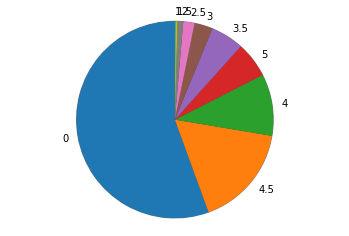

In [18]:
#A Pie chart to see how the rating have conquerd the dataset 
from matplotlib.pyplot import figure
figure(figsize=(50,25))
a = df.average_user_rating.value_counts()
figureObject, axesObject = plt.subplots()
axesObject.pie(a,labels=[0, 4.5, 4, 5, 3.5, 3 , 2.5 ,2 ,1.5 ,1 ] ,radius = 18000,shadow= True,startangle=90)
axesObject.axis('equal')
plt.show()

# Identify Which genres have higher user ratings.

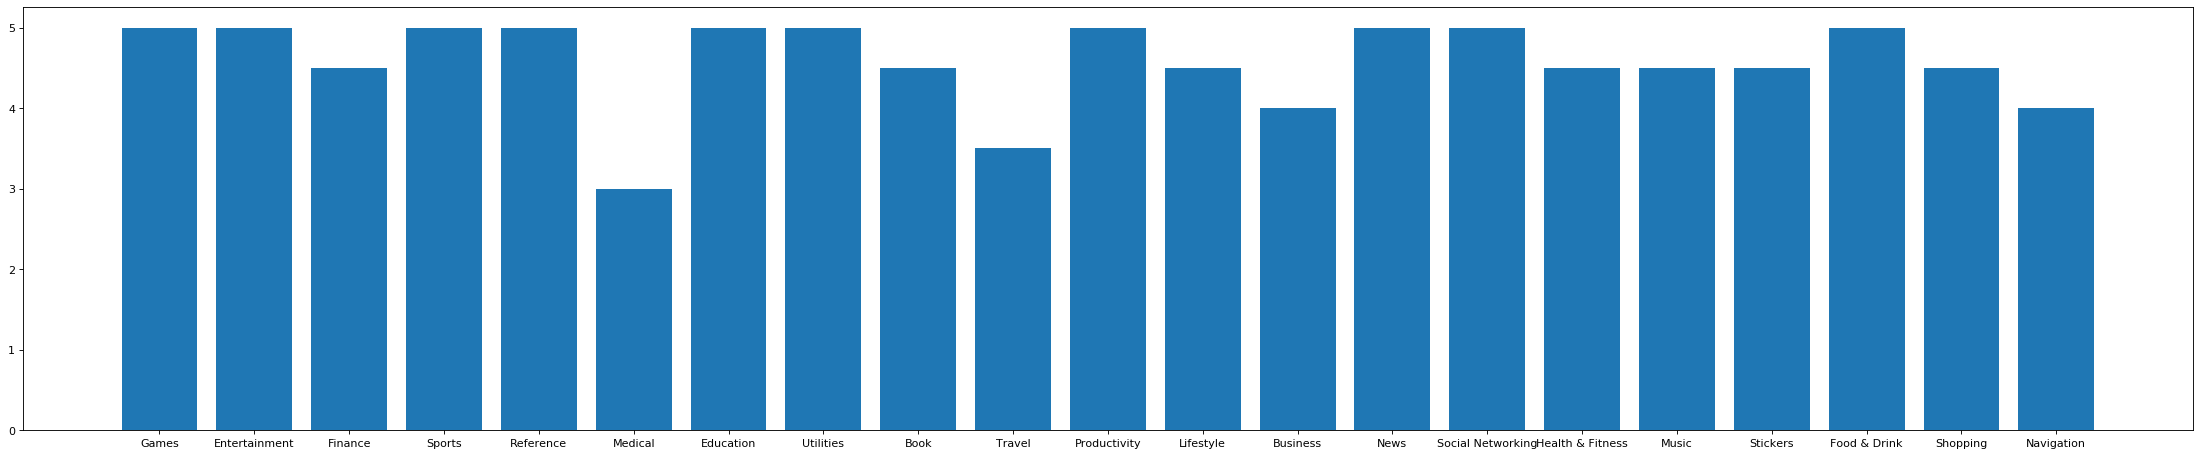

In [41]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(35,7), dpi=80, facecolor='w', edgecolor='k')
plt.bar(df['primary_genre'], df['average_user_rating'])
plt.show()

# Identify trend of user rating based on pricing.

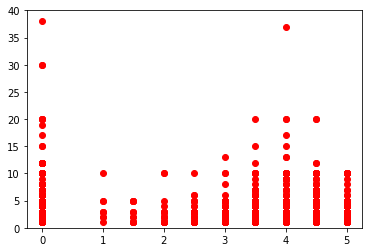

In [14]:
paid = df.loc[df['price']> 0]
plt.plot(paid.average_user_rating ,paid.price  , 'or')
plt.ylim(0, 40)
plt.show()
#As below scatter graph the user rating is independent to price of the app

#  To expose the best combination for strategy games available in the appstore in order to get a good user rating 

In [34]:
r = df[df["genres"].str.contains(("Strategy"))] #to select strategy rows
s = r[r['average_user_rating'] > 4]

In [44]:
#due to many combinations we have to filter it by taking only combinations that as user rating count greater than 100000
p = s[s["user_rating_count"]>100000]
q = p["genres"].unique()
q
#the below combinations can lead to getting more 4 rating in app store

array(['Games, Strategy, Board, Entertainment',
       'Games, Card, Entertainment, Strategy',
       'Games, Strategy, Simulation',
       'Games, Action, Entertainment, Strategy',
       'Games, Strategy, Entertainment, Adventure',
       'Games, Strategy, Action, Entertainment',
       'Games, Strategy, Action',
       'Games, Entertainment, Casual, Strategy',
       'Games, Simulation, Strategy',
       'Games, Entertainment, Action, Strategy',
       'Games, Role Playing, Entertainment, Strategy',
       'Games, Strategy, Role Playing',
       'Games, Strategy, Entertainment, Action',
       'Games, Strategy, Puzzle', 'Games, Card, Strategy',
       'Games, Simulation, Strategy, Entertainment',
       'Games, Strategy, Entertainment, Simulation',
       'Games, Finance, Strategy, Simulation', 'Games, Action, Strategy',
       'Games, Simulation, Entertainment, Strategy'], dtype=object)

# Inferences

## Modules

## Reading the csv file and cleaning the data


## Simple Analysis 

## Finding the genre which has higest rating

## is rating getting affected the rating?

## To get the best combinations of strategy genre so we can get more than 4 rating